- `trochvision` - base domain library for PyTorch computer vision
- `torchvision.datasets` - get datasets and data loading functions for computer vision
- `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
- `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with an ML model
- `torch.utils.data.Dataset` - base dataset class for PyTorch
- `torch.utils.data.DataLoader` - Creates a python iterable over a dataset

In [ ]:
# importing pytorch
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.6.0+cu124
0.21.0+cu124


## **Getting a Dataset**
- Using fashion MNIST dataset from `torchvision.datasets`

In [ ]:
# Setup the training data
train_data = datasets.FashionMNIST(root='data', # where to download the data to?
                                   train=True, # do we want the training dataset?
                                   download=True, # do we want to download? Yes/No?
                                   transform=torchvision.transforms.ToTensor(), # how do we want to transform the data
                                   target_transform=None # how do we want to transform the labels/targets?
                                   )

test_data = datasets.FashionMNIST(root='data',
                                  train=False,
                                  download=True,
                                  transform=ToTensor(),
                                  target_transform=None
                                  )

100%|██████████| 26.4M/26.4M [00:02<00:00, 13.0MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 209kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.83MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 8.06MB/s]


In [ ]:
len(test_data), len(train_data)

(10000, 60000)

In [ ]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets[:5]

tensor([9, 0, 0, 3, 0])

In [ ]:
# check the shape
print(f'Image shape: {image.shape} -> [color_chanel, height, width]')
print(f'Image label: {class_names[label]}')

Image shape: torch.Size([1, 28, 28]) -> [color_chanel, height, width]
Image label: Ankle boot


### Visualizing the data

Image shape: torch.Size([1, 28, 28])


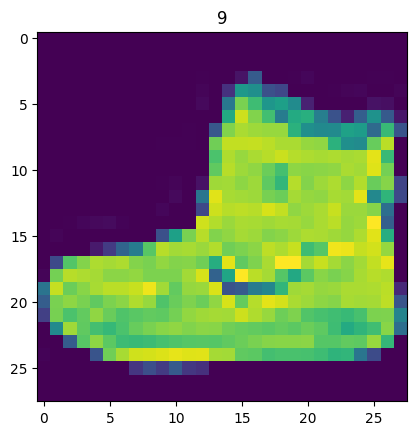

In [ ]:
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label);

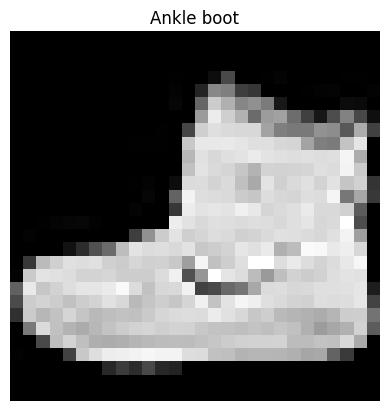

In [ ]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False);

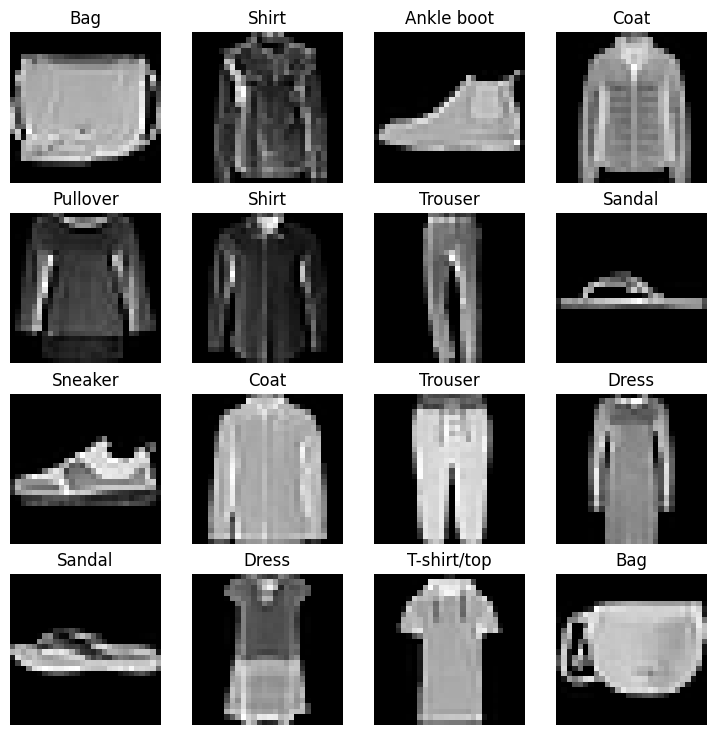

In [ ]:
# Plot more images
# torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap='gray')
  plt.title(class_names[label])
  plt.axis(False);

In [ ]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

### Prepare DataLoader
- Turning the data into batches(min-batches).
- Reasons for doing this:
1. It is more computationally efficient, since the computing hardware may not be able to look (store in memory) 60000 images at once. So we break it down to 32 images at a time (batch size).
2. It gives the neural network more chances to update its gradients per epoch.

In [ ]:
from torch.utils.data import DataLoader

# Set up the batch size
BATCH_SIZE = 32

# Turn datasets into iterables
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True,
                              # batch_sampler=None
                              )
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7a8fe11d0610>,
 <torch.utils.data.dataloader.DataLoader at 0x7a8fe100ac90>)

In [ ]:
# Print Check!!
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} of batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} of batches of {BATCH_SIZE}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7a8fe11d0610>, <torch.utils.data.dataloader.DataLoader object at 0x7a8fe100ac90>)
Length of train dataloader: 1875 of batches of 32
Length of test dataloader: 313 of batches of 32


In [ ]:
# Check what is inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 4, label size: torch.Size([])


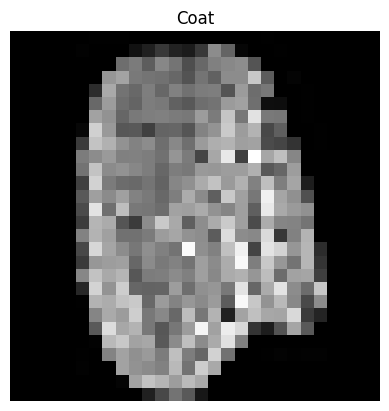

In [ ]:
# Show a sample of a image in the features and label's batch above
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [ ]:
next(iter(train_dataloader))

[tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000

In [ ]:
rand_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
rand_idx

7

## Model 0: Building a baseline model

In [ ]:
# Flatten layeer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print what happened
print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {output.shape}")

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [ ]:
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # No learnable parameters
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )
  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
# Fit the data
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=784, # 28*28
    hidden_units=10, # How many units in the hidden layer
    output_shape=len(class_names) # 1 for every class
).to('cpu')
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1,1,28,28])
# model_0(dummy_x).argmax(dim=1)
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

### Setup loss, optimizer and evaluation metrics
- Loss fn - `nn.CrossEntropyLoss()` multiclass
- optimizer - `torch.SGD()`
- metrics -  classification problem - accuracy as evaluation metric

In [ ]:
import requests
from pathlib import  Path

# Download helper functions
if Path('helper_functions.py').is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [ ]:
# Import accuracy metric
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)


### Creating a function to time our experiments
Things to track in a machine learning experiment:

1. Model's performance(loss and accuracy vlaues, etc)
2. How fast it runs.

And therefore, a model with the highest accuracy and faster runtime is the ideal scenario.

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
  """
  Prints the difference between start and end time.
  """
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [ ]:
start_time = timer()
torch.randint(5, 101000000, size=[102200])
end_time = timer()
print_train_time(start=start_time, end=end_time, device='cpu')

Train time on cpu: 0.003 seconds


0.00270894599998428

### Creating a training loop and training a model on batches of data
1. Loop through epochs
2. Loop through training batches, perform training steps, calculate the train loss per batch.
3. Loop through testing batches, perform steps, calculate the test loss per batch.
4. Print out what's happening
5. Time it

In [ ]:
# # Import tqdm for progress bar
# from tqdm.auto import tqdm

# torch.manual_seed(42)
# train_time_start_on_cpu = timer()

# # Set the number of epochs (keeping this small for faster training time)
# epochs=3

# # Create training and testing loop
# for epoch in tqdm(range(epochs)):
#   print(f"Epoch: {epoch}\n-----")
#   ### Training
#   train_loss = 0
#   # Add a loop to loop through the training batches
#   for batch, (X,y) in enumerate(train_dataloader):
#     model_0.train()
#     # 1. Forward pass
#     y_pred = model_0(X)

#     # 2. Calculate the loss (per batch)
#     loss = loss_fn(y_pred, y)
#     train_loss += loss # Accumulate the loss for every batch

#     # 3. Optimizer zero grad
#     optimizer.zero_grad()

#     # 4. Loss backward
#     loss.backward()

#     # 5. Optimizer step
#     optimizer.step()

#     # Print what is happening
#     if batch % 400 == 0:
#       print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

#   # Divide total train loss by length of train dataloader (to find the average train loss per epoch)
#   train_loss/=len(train_dataloader)

#   ### Testing
#   test_loss, test_acc = 0, 0
#   model_0.eval()
#   with torch.inference_mode():
#     for X_test, y_test in test_dataloader:
#       # 1. Forward pass
#       test_pred = model_0(X_test)

#       # 2. Calculate the loss (accumulatively)
#       test_loss += loss_fn(test_pred, y_test)

#       # 3. Calculate accuracy
#       test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

#     # Calculate the test loss average per batch
#     test_loss/=len(test_dataloader)

#     # Calculate the test acc average per batch
#     test_acc/=len(test_dataloader)

#   # Print what is happening
#   print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}%")

# # Calculate training time
# train_time_end_on_cpu = timer()
# total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
#                                             end=train_time_end_on_cpu,
#                                             device=str(next(model_0.parameters()).device))

In [ ]:
# # Import tqdm for progress bar
# from tqdm.auto import tqdm

# # Set the seed and start the timer
# torch.manual_seed(42)
# train_time_start_on_cpu = timer()

# # Set the number of epochs (keeping this small for faster training time)
# epochs = 3

# # Create training and testing loop
# for epoch in tqdm(range(epochs)):
#     print(f"Epoch: {epoch}\n-----")

#     ### Training
#     train_loss = 0
#     for batch, (X, y) in enumerate(train_dataloader):
#         model_0.train()
#         # 1. Forward pass
#         y_pred = model_0(X)

#         # 2. Calculate loss
#         loss = loss_fn(y_pred, y)
#         train_loss += loss

#         # 3. Zero gradients
#         optimizer.zero_grad()

#         # 4. Backpropagation
#         loss.backward()

#         # 5. Optimizer step
#         optimizer.step()

#         # Show progress
#         if batch % 400 == 0:
#             print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

#     # Average training loss
#     train_loss /= len(train_dataloader)

#     ### Testing
#     test_loss, test_acc = 0, 0
#     model_0.eval()
#     with torch.inference_mode():
#         for X_test, y_test in test_dataloader:
#             # 1. Forward pass
#             test_pred = model_0(X_test)

#             # 2. Accumulate loss
#             test_loss += loss_fn(test_pred, y_test)

#             # 3. Accumulate accuracy
#             test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

#         # Average test metrics
#         test_loss /= len(test_dataloader)
#         test_acc /= len(test_dataloader)

#     # Print results for epoch
#     print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.2f}%\n")

# # Calculate training time
# train_time_end_on_cpu = timer()
# total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
#                                             end=train_time_end_on_cpu,
#                                             device=str(next(model_0.parameters()).device))


In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)

    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X)

            # 2. Calculate loss (accumulatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu: 34.432 seconds


In [ ]:
str(next(model_0.parameters()).device)

'cpu'

In [ ]:
len(train_dataloader.dataset)

60000

In [ ]:
len(train_dataloader)

1875

### Make predictions and get model 0 results
- Creating a function that will use the model to make predictions on the data in the `DataLoader` and then evaluate those predictions using the loss function and accuracy function.

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn):
  """
  Returns a dictionary containing the results of model on data_loader.

  Args:
      model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
      data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
      loss_fn (torch.nn.Module): The loss function of model.
      accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

  Returns:
      (dict): Results of model making predictions on data_loader.
  """
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      # Make predictions with the model
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))  # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)

    # Scale loss and acc to find average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name" : model.__class__.__name__,  # only works when model was created with a class
          "model_loss" : loss.item(),
          "model_acc" : acc}

# Create an an instance to calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn, accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

### Setup device agnostic code (for using GPU if avilable)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

## **Model 1: Building a "better" model using non-linearity**

In [ ]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # flatten inputs into a single vector
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
next(model_0.parameters()).device

device(type='cpu')

In [ ]:
# Create an instance of model 1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=28*28, #this is the output of the flatten after the image goes in
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cpu')

### Setup loss, optimizer and evaluation metrics

In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()  # Measure how wrong the model is
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1) # tries to update the model's parameters to reduce the loss

### Functionizing training and evaluation/testing loops
Creating a function for:

- training loop - `train_step()`
- testing loop - `test_step()`

In [ ]:
def train_step(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device=device):
  """
  Performs a training step with model trying to learn on dataloader.
  """
  train_loss, train_acc = 0, 0

  # Put model into training mode
  model.train()

  for batch, (X,y) in enumerate(data_loader):

    # put data on target device
    X,y = X.to(device), y.to(device)

    # 1. Forward pass (outputs the raw logits from the model)
    y_pred = model(X)

    # 2. Calculate loss and accuracy (per batch)
    loss = loss_fn(y_pred, y)
    train_loss +=  loss # accumulate train loss
    train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))  # logits -> prediction labels

    # 3. optimizer zero grad
    optimizer.zero_grad()

    # 4. Backpropagation
    loss.backward() # Backpropagate the loss for the current batch

    # 5. Gradient descent
    optimizer.step()

  # Divide total train loss and acc by length of train dataloader (per batch)
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")


In [ ]:
def test_step(model:torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn,
              device:torch.device=device):
  """
  Performs a testing loop step on model going over dataloader.
  """
  test_loss, test_acc = 0, 0
  model.eval()

  # Trun on inference mode context manager
  with torch.inference_mode(): # batch loop
    for X,y in data_loader:
      # send the data to device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass (raw logits)
      test_pred = model(X)

      # 2. Claculate the loss and accuracy
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1)) # logits -> prediction probabilities

    # Adjust metrics and print out (still within the context manager)
    test_loss /= len(data_loader) # find the average per batch
    test_acc /= len(data_loader)

    print(f"Test Loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [ ]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_device = timer()

epochs=3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_on_device = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_device,
                                            end=train_time_end_on_device,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------------
Train loss: 1.09199 | Train accuracy: 61.34%
Test Loss: 0.95636 | Test accuracy: 65.00%

Epoch: 1
------------
Train loss: 0.78101 | Train accuracy: 71.93%
Test Loss: 0.72227 | Test accuracy: 73.91%

Epoch: 2
------------
Train loss: 0.67027 | Train accuracy: 75.94%
Test Loss: 0.68500 | Test accuracy: 75.02%

Train time on cpu: 34.472 seconds


In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
total_train_time_model_0

34.431848916999996

In [ ]:
total_train_time_model_1

34.47245211799998

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn,
              device: torch.device=device):
  """
  Returns a dictionary containing the results of model on data_loader.

  Args:
      model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
      data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
      loss_fn (torch.nn.Module): The loss function of model.
      accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

  Returns:
      (dict): Results of model making predictions on data_loader.
  """
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      # device agnostic
      X,y = X.to(device), y.to(device)
      # Make predictions with the model
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))  # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)

    # Scale loss and acc to find average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name" : model.__class__.__name__,  # only works when model was created with a class
          "model_loss" : loss.item(),
          "model_acc" : acc}

In [ ]:
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

## **Model 2: Building a CNN (convolutional neural network)**
CNN's are known for their capabilities to find patterns in visual data.

Notes on the hyperparameters of conv2d layer:
- `Padding` controls the image border. Helps keep the output size the same as the input size (or control how much it shrinks).
- `Kernel size` controls how much of the image the filter looks at in one go. (or filter) is a small window that moves over the image to detect patterns like edges or textures. A smaller kernel size captures fine details, while a larger kernel size captures more information at once but may lose some fine details.
- `Stride` controls how much the filter moves at each step. Stride is how much the filter moves (or "steps") at a time across the image. If the stride is 1, the filter moves one pixel at a time. If the stride is 2, it jumps 2 pixels at a time.

In [ ]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG
  model from CNN explainer website.
  """
  def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
    super().__init__()
    # block 1
    self.conv_block = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),  # values that we can set ourselves in our NN's are called hypeparameters
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    # block 2
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    # Output layer
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, # clueless for the shape for the hidden unit here (multiply with the output shape for conv_block_2)
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block(x)
    # print(f'Output shape of conv_block_1: {x.shape}')
    x = self.conv_block_2(x)
    # print(f'Output shape of conv_block_2: {x.shape}')
    x = self.classifier(x)
    # print(f'Output shape of classifier: {x.shape}')
    return x

In [ ]:
# Instantiate the model
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, # color channel
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

In [ ]:
random_image_tensor = torch.randn(1,28,28)
random_image_tensor.shape

torch.Size([1, 28, 28])

In [ ]:
model_2(random_image_tensor.unsqueeze(0))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], grad_fn=<AddmmBackward0>)

#### Stepping through `nn.Conv2d()`

In [ ]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=[32, 3, 64, 64])
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape; {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape; torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [ ]:
#### DEMO ****************
torch.manual_seed(42)
# Create a single conv2d layer
conv_layer = nn.Conv2d(
    in_channels=3,
    out_channels=10,
    kernel_size=3,
    stride=1,
    padding=0
)

# Pass the data through the convolutional layer
# conv_output = conv_layer(test_image.unsqueeze(0))
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 62, 62])

In [ ]:
conv_output.shape

torch.Size([10, 62, 62])

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

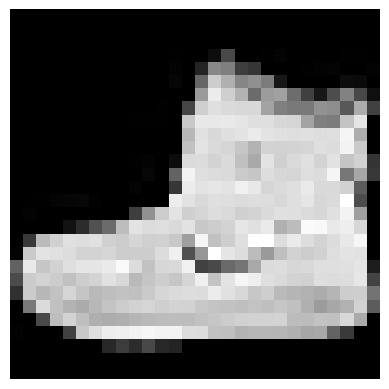

In [ ]:
plt.imshow(image.squeeze(0), cmap='gray')
plt.axis(False)

### Setup a loss function and optimizer for `model_2`

In [ ]:
# Setup loss function/eval metrics/optimizer
from helper_functions import *

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

### Training and testing `model_2` using training and testing functions

In [ ]:
torch.manual_seed(42)
# torch.cuda.manual_seed(1234)

# measure time
from timeit import default_timer as Timer
train_time_start_model_2 = timer()

# Train and test the model
epochs=3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n----------------")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
            data_loader=train_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----------------
Train loss: 0.30561 | Train accuracy: 88.94%
Test Loss: 0.28034 | Test accuracy: 89.69%

Epoch: 1
----------------
Train loss: 0.29156 | Train accuracy: 89.37%
Test Loss: 0.30953 | Test accuracy: 88.69%

Epoch: 2
----------------
Train loss: 0.27827 | Train accuracy: 90.03%
Test Loss: 0.27263 | Test accuracy: 90.24%


Train time on cpu: 279.845 seconds


In [ ]:
# Get model_2 results
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.312928169965744,
 'model_acc': 88.81789137380191}

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## Compare model results and training time

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.312928,88.817891


In [ ]:
# Add training time to results comparison
compare_results['training_time'] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]

compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,34.431849
1,FashionMNISTModelV1,0.685001,75.019968,34.472452
2,FashionMNISTModelV2,0.312928,88.817891,279.845069


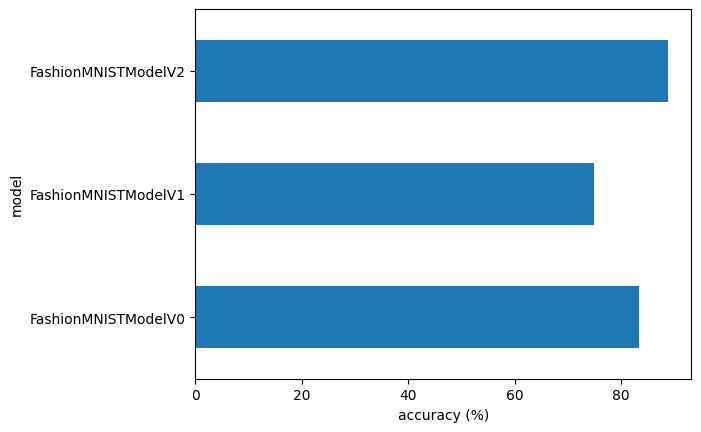

In [ ]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

### Make and evaluate random predictions with the best model

In [ ]:
def make_predictions(model:torch.nn.Module,
                     data:list,
                     device:torch.device=device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the smaple (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # Get prediction probability (logit->prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_prob off the GPU (in case it was being used) for further calculations
      pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into tensor
    return torch.stack(pred_probs)

In [ ]:
img.shape

(torch.Size([1, 28, 28]), tensor(4))

In [ ]:
import random
# random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9): # randomly sampling 9 samples (3x3 plot)
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
# test_samples[0].shape

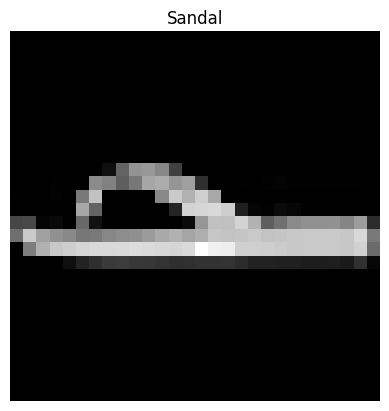

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]])
plt.axis(False);

In [ ]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples,
                              device=device)
# View first 2 predictions
pred_probs[:2]

tensor([[3.3429e-05, 4.9731e-06, 9.1176e-06, 1.6932e-04, 2.1854e-06, 9.9299e-01,
         5.4034e-06, 1.8419e-03, 4.9364e-03, 8.3774e-06],
        [1.8575e-01, 4.5256e-03, 4.7661e-01, 1.4277e-02, 6.5361e-03, 3.9183e-04,
         2.8129e-01, 5.5969e-04, 2.9929e-02, 1.2655e-04]])

In [ ]:
test_labels

[5, 2, 0, 1, 2, 2, 1, 4, 4]

In [ ]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 2, 0, 1, 2, 2, 1, 4, 4])

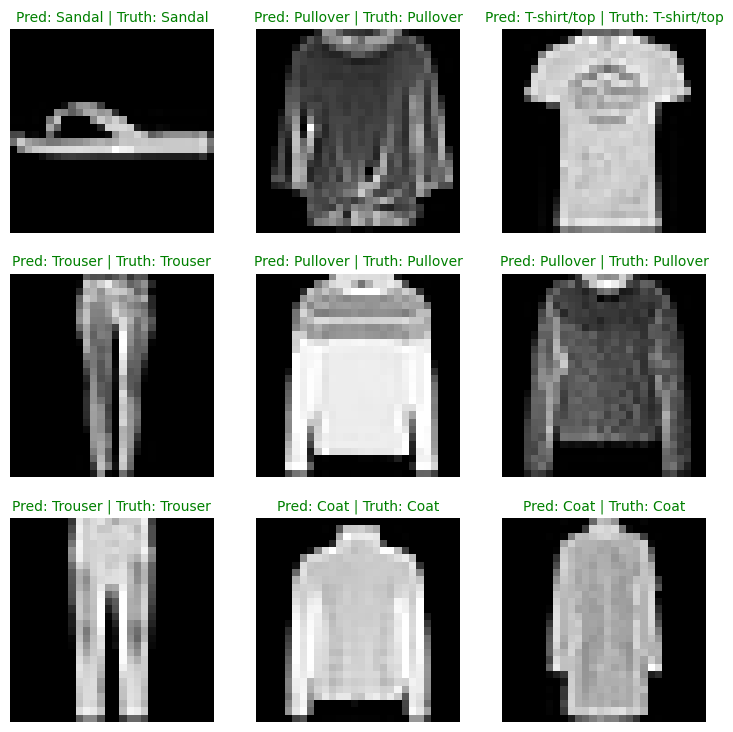

In [ ]:
# Plot predictions
plt.figure(figsize=(9, 9))
n_rows = 3
n_cols = 3
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(n_rows, n_cols, i+1)

  # plot the target image
  plt.imshow(sample.squeeze(), cmap='gray')

  # Find the prediction (in text form, e.g. Sandal)
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c='g') # green text if prediction same as truth
  else:
    plt.title(title_text, fontsize=10, c='r')

  plt.axis(False);

### Making confusion matrix for further prediction evaluation
A confusion matrix is a fantastic way of evaluating classification models visually:

1. Make predisctions with the trained model on the test dataset.
2. Make a confusion matrix `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`

In [ ]:
# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc='Making predictions...'):
    # Send the data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> prediction labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    # Put prediction on cpu for evaluation
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
y_preds[:10]

[tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 4, 6, 0, 2, 5, 7, 5,
         1, 6, 6, 6, 9, 6, 8, 3]),
 tensor([3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 6, 7, 6, 7, 2, 1, 4, 6, 4, 4, 5, 6, 2, 2,
         8, 4, 8, 0, 7, 7, 8, 5]),
 tensor([1, 1, 3, 3, 7, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2,
         0, 6, 5, 3, 6, 7, 1, 6]),
 tensor([6, 1, 4, 2, 3, 6, 7, 6, 7, 6, 5, 7, 9, 4, 2, 5, 7, 6, 5, 2, 6, 6, 7, 6,
         0, 0, 9, 9, 3, 0, 8, 4]),
 tensor([1, 5, 4, 1, 9, 1, 8, 4, 6, 1, 2, 8, 1, 6, 0, 0, 1, 6, 3, 3, 2, 2, 4, 4,
         1, 4, 8, 6, 4, 7, 9, 3]),
 tensor([5, 2, 3, 8, 0, 9, 2, 7, 4, 2, 6, 5, 4, 1, 2, 1, 3, 0, 8, 1, 0, 9, 3, 6,
         7, 9, 8, 4, 4, 7, 1, 2]),
 tensor([3, 6, 3, 2, 8, 3, 6, 1, 1, 0, 2, 9, 2, 4, 6, 7, 9, 8, 4, 1, 8, 4, 1, 3,
         1, 6, 7, 2, 8, 5, 6, 0]),
 tensor([7, 7, 6, 6, 7, 6, 7, 8, 9, 2, 9, 0, 5, 1, 3, 4, 5, 4, 9, 2, 2, 8, 6, 4,
         6, 2, 9, 7, 3, 5, 5, 4]),
 tensor([8, 5, 2, 3, 0, 4, 8, 6, 6, 6, 3, 8, 9, 6, 1, 6, 6, 2, 3, 0, 8, 

In [ ]:
y_pred_tensor.shape

torch.Size([10000])

In [ ]:
import mlxtend

In [ ]:
mlxtend.__version__

'0.23.4'

In [ ]:
!pip install torchmetrics

In [ ]:
# See if required packages are installed and if not, install themm
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19.0 or higher"
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 751.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 57.1 MB/s eta 0:00:00
mlxtend version: 0.23.4


In [ ]:
assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19.0 or higher"

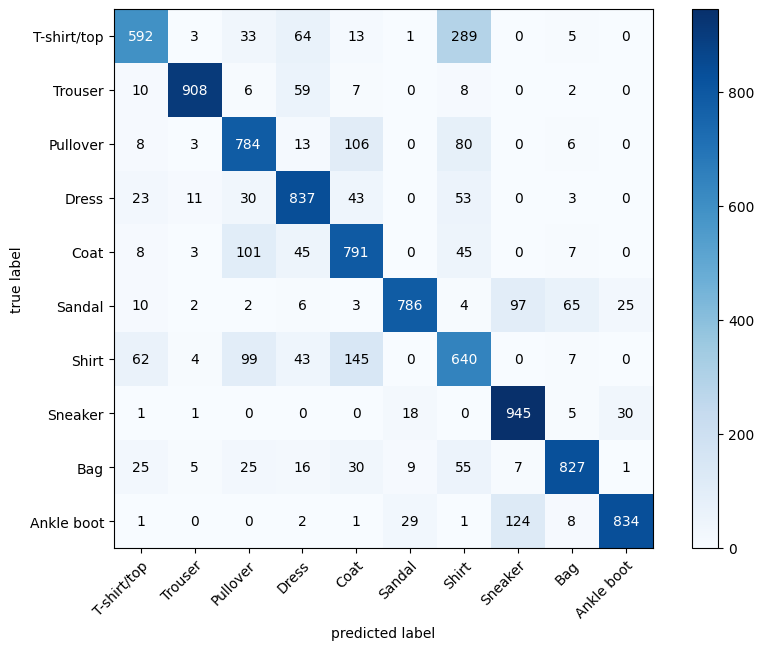

In [ ]:
# Import the required libraries
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names)) # task='multilabel' if the classification problem is single-label and task='multiclass' if the classification problem is multi-class.
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),  # matplotlib likes working with numpy
                                class_names=class_names,
                                figsize=(10, 7),
                                colorbar=True
                                )

In [ ]:
confmat_tensor

tensor([[592,   3,  33,  64,  13,   1, 289,   0,   5,   0],
        [ 10, 908,   6,  59,   7,   0,   8,   0,   2,   0],
        [  8,   3, 784,  13, 106,   0,  80,   0,   6,   0],
        [ 23,  11,  30, 837,  43,   0,  53,   0,   3,   0],
        [  8,   3, 101,  45, 791,   0,  45,   0,   7,   0],
        [ 10,   2,   2,   6,   3, 786,   4,  97,  65,  25],
        [ 62,   4,  99,  43, 145,   0, 640,   0,   7,   0],
        [  1,   1,   0,   0,   0,  18,   0, 945,   5,  30],
        [ 25,   5,  25,  16,  30,   9,  55,   7, 827,   1],
        [  1,   0,   0,   2,   1,  29,   1, 124,   8, 834]])

## Save and load best performing model

In [ ]:
from pathlib import Path

# create model directory path
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# create model save
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# MODEL_SAVE_PATH

# Save the model state dict
print(f"Saving the model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving the model to: models/03_pytorch_computer_vision_model_2.pth


In [ ]:
# Ceeate a new instance when loading the model
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

# Load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send the model to the target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.312928169965744,
 'model_acc': 88.81789137380191}

In [ ]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(model=loaded_model_2,
                                    data_loader=test_dataloader,
                                    loss_fn=loss_fn,
                                    accuracy_fn=accuracy_fn,
                                    device=device)
loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.312928169965744,
 'model_acc': 88.81789137380191}

In [ ]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results['model_loss']),
              torch.tensor(loaded_model_2_results['model_loss']),
              atol=1e-08)  # Absolute tolerance

tensor(True)